## Analysis for the Urban and Rural areas

As one of our research questions was to see the differences between what was considered urban vs rural areas, one of the objectives for this question was to find a way to define for each entry how to consider it a developed urban area or a low population density rural area. According to the case study performed by Cybera (Towards a clear understanding or rural internet) For comparing rural and municipal internet speeds, we could check if the entry or tile in that entry was assigned to a PCCLASS (Population Centry Type).

Considering the previous statement, we could guess that any entry/tile with a "Null" value in the PCCLASS column could refer to a rural area. The other values for the Population Centre Type are:
- 2 = Small Population Centre (population between 1,000 and 29,999)
- 3 = Medium Population Centre (population between 30,000 and 99,999)
- 4 = Large urban Population Centre (population of 100,000 or more)

Before trying to analyze those tiles/entries without a PCCLASS, we could see how the Population Centres are performing in regards to the goal desired of 50 Mbps of download internet speed.

In [38]:
# Getting libraries ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os

In [39]:
# Change the directory to access the Final.csv
# os.chdir('/home/jovyan/data')
os.chdir('/home/ubuntu/ookla-statcan-analysis-neutron-1/data/hackathon')

In [40]:
# Loading the dataset
finalData = pd.read_csv('Final.csv')
finalData.head()

/tmp/ipykernel_4171903/2856189719.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  finalData = pd.read_csv('Final.csv')


,Unnamed: 0,quadkey,avg_d_kbps,avg_u_kbps,year,PRNAME,CDNAME,CDTYPE,CSDNAME,CSDTYPE,...,SACTYPE,das_area,tile_area,tile_frac,das_frac,DAPOP,POP_DENSITY,PCNAME,PCTYPE,PCCLASS
0,35230,302231302213222,86968.308824,14096.147059,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,4.489387e+06,205331.876525,0.917314,0.041955,1420,316.301553,Acton,2.0,2.0
1,18541,302231302213223,148950.375000,108518.000000,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,2.309252e+07,205331.876525,0.475620,0.004229,470,20.352909,Acton,2.0,2.0
2,75590,302231302230013,106212.166667,76710.666667,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,5.391016e+06,205402.379648,0.894827,0.034094,1030,191.058601,Acton,2.0,2.0
3,279031,302231302230022,8720.000000,934.000000,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,1.030375e+07,205472.906899,0.611219,0.012189,505,49.011263,Acton,2.0,2.0
4,41645,302231302230023,14591.963768,1794.289855,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,1.765704e+06,205472.906900,0.871430,0.101407,795,450.245236,Acton,2.0,2.0


In [41]:
# Let's consider only the entries in which the PCCLASS is defined.
finalDataPC = finalData[finalData['PCCLASS'].notnull()]

In [42]:
finalDataPC.tail()

,Unnamed: 0,quadkey,avg_d_kbps,avg_u_kbps,year,PRNAME,CDNAME,CDTYPE,CSDNAME,CSDTYPE,...,SACTYPE,das_area,tile_area,tile_frac,das_frac,DAPOP,POP_DENSITY,PCNAME,PCTYPE,PCCLASS
102917,56275,212033333103332,75675.656250,17305.312500,[2019],British Columbia / Colombie-Britannique,Nanaimo,RD,Nanaimo A,RDA,...,2,5.015426e+05,160346.356280,0.562657,0.179885,530,1056.739740,Cedar,2.0,2.0
102918,96438,212033333103333,126934.272727,13990.909091,[2019],British Columbia / Colombie-Britannique,Nanaimo,RD,Nanaimo A,RDA,...,2,4.630674e+06,160346.356251,1.000000,0.034627,530,114.454192,Cedar,2.0,2.0
102919,224921,212033333121101,32822.500000,12302.500000,[2019],British Columbia / Colombie-Britannique,Nanaimo,RD,Nanaimo A,RDA,...,2,2.523227e+06,160373.907606,0.702853,0.044673,445,176.361475,Cedar,2.0,2.0
102920,160104,212033333121110,128365.000000,16136.000000,[2019],British Columbia / Colombie-Britannique,Nanaimo,RD,Nanaimo A,RDA,...,2,8.310025e+06,160373.907606,0.744792,0.014374,445,53.549778,Cedar,2.0,2.0
102921,128698,212033333121111,46559.500000,8600.500000,[2019],British Columbia / Colombie-Britannique,Nanaimo,RD,Nanaimo A,RDA,...,2,4.630674e+06,160373.907577,0.898306,0.031111,530,114.454192,Cedar,2.0,2.0


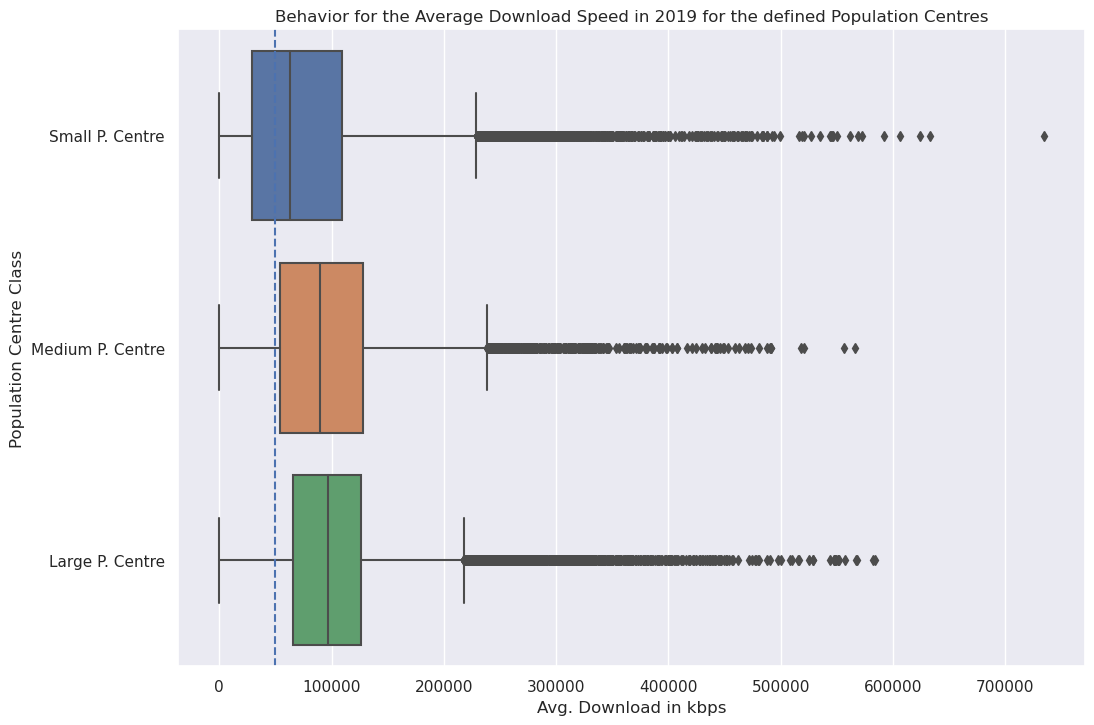

In [43]:
# Boxplot behavior for the Population Centre Type
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data=finalDataPC, x="avg_d_kbps", 
                                    y="PCCLASS",  
                                    orient = 'h')
                                    #showfliers = False)

plt.xlabel('Avg. Download in kbps')
plt.ylabel('Population Centre Class')
plt.yticks([0, 1, 2], ['Small P. Centre', 'Medium P. Centre', 'Large P. Centre'])
plt.title('Behavior for the Average Download Speed in 2019 for the defined Population Centres')
plt.axvline(50000, linestyle='--')
plt.show(g)

As expected, we can see that the greater the Population Centre is, the more tiles/entries associated with that centre actually surpass the goal of 50 Mbps for internet downloads. We can clearly notice that for the Small Population Centre, in average their lower quartile value is even below the goal of 50 Mbps.

Another visualization we could perform to see the performance of these centres is to see the relationship between the population density and the internet download speed based on the PCCLASS, with the use of a scatterplot:

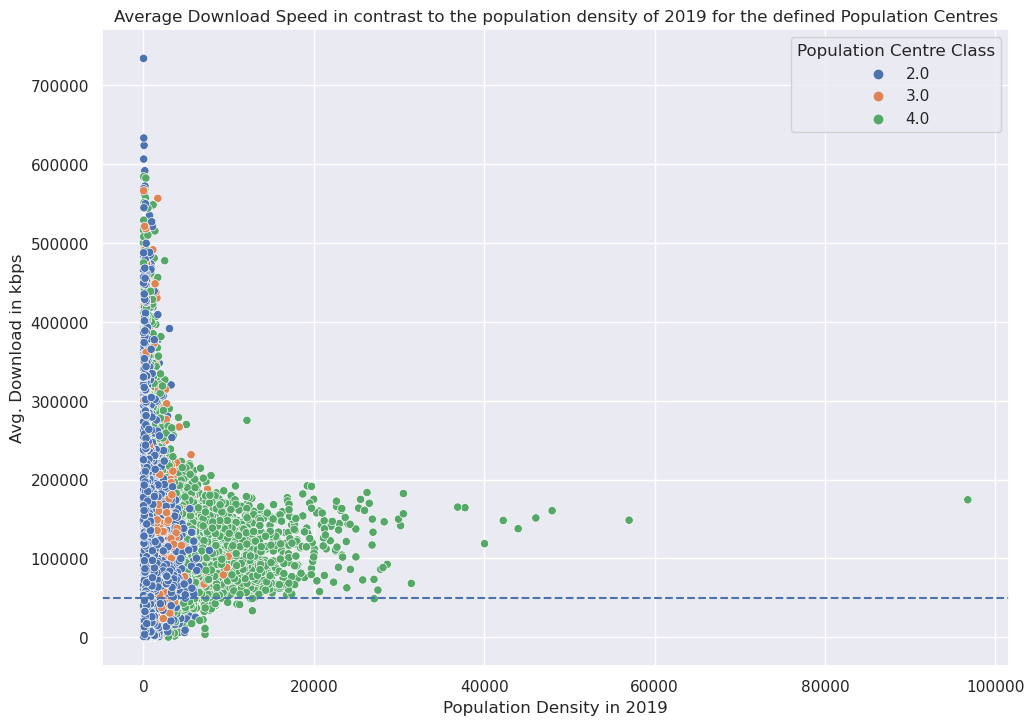

In [44]:
#Scatter plot for the AVG download speeds among the population density of each Population Centre

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.scatterplot(data=finalDataPC, x="POP_DENSITY", 
                                    y="avg_d_kbps", 
                                    hue="PCCLASS", 
                                    palette="deep")

plt.xlabel('Population Density in 2019')
plt.ylabel('Avg. Download in kbps')
plt.legend(title='Population Centre Class', loc='upper right')
plt.title('Average Download Speed in contrast to the population density of 2019 for the defined Population Centres')
plt.axhline(50000, linestyle='--')
plt.show(g)

Even though we can still see that most of the tiles associated with a small population centre performed beyond the established expectations, it is still the most common PCCLASS value found within the area refering to those tiles or entries in which the goal of 50 Mbps was not reached.

Now, considering some of the small population centres are not performing within the expected goal, we can analyze how those tile areas with no defined PCCLASS, considering them to be rural areas, are performing in the same internet speed tests. In order to analyze such entries, the "Null" value in the PCCLASS column was changed to "Outside".

In [45]:
#Let's change the NaN values for the PCCLASS cells in such entries
# Let's convert the NULL values into "Outside"
finalData['PCCLASS'].fillna("Outside", inplace = True)

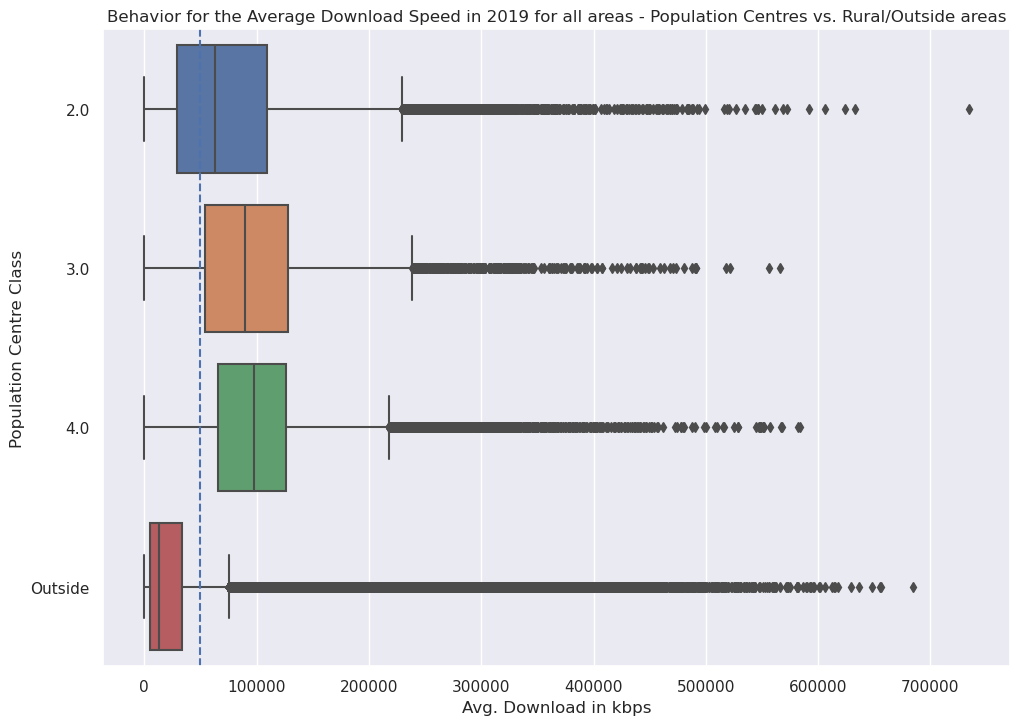

In [46]:
# Boxplot behavior for the Population Centre Type
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data=finalData, x="avg_d_kbps", 
                                    y="PCCLASS",  
                                    orient = 'h')
                                    #showfliers = False)

plt.xlabel('Avg. Download in kbps')
plt.ylabel('Population Centre Class')
plt.title('Behavior for the Average Download Speed in 2019 for all areas - Population Centres vs. Rural/Outside areas')
plt.axvline(50000, linestyle='--')
plt.show(g)

As expected considering these entries as rural areas, we can clearly spot the difference in performance for the internet speed tests for all the tiles/entries without a PCCLASS. Most of these cases were not capable of reaching the goal of 50 Mbps in 2019, and more context would be needed in order to understand why some cases could have such a high internet download speeds, which could refer to research centres in zone far away from an urban area, as well as the area depending on which province is it located.

If the CRTC wants to target low internet speed areas, with the previous visualizations, it's safe to say that checking the Population Centre Type of such areas could be a good indicator of how good that area is performing.